Import Libs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

Open Data file

In [4]:
data = pd.read_csv('../dataset/Retail_Store_Data.csv')
data.head()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday
0,1,174.835708,28.423084,2,Groceries,Tuesday
1,2,143.086785,21.502462,7,Electronics,Sunday
2,3,182.384427,80.007327,5,Apparel,Saturday
3,4,226.151493,87.712330,5,Groceries,Saturday
4,5,138.292331,13.474476,8,Groceries,Tuesday


In [5]:
data.describe()

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,150.966603,65.401369,4.929000
std,288.819436,48.960797,31.719252,2.096749
min,1.000000,-12.063367,10.354009,0.000000
25%,250.750000,117.620485,37.191903,3.000000
50%,500.500000,151.265031,66.773863,5.000000
75%,750.250000,182.397194,92.095050,6.000000
max,1000.000000,342.636575,119.935510,12.000000


In [6]:
#check for null values
data.isnull().sum()

Customer_ID        0
Purchase_Amount    0
Visit_Duration     0
Items_Purchased    0
Store_Section      0
Weekday            0
dtype: int64

Probability analysis

- Bernoulli Distribution:

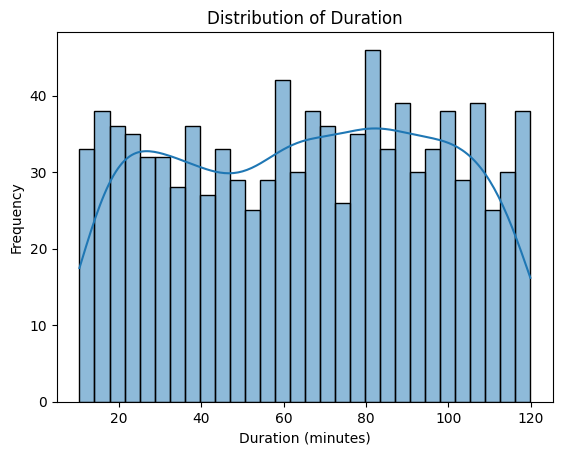

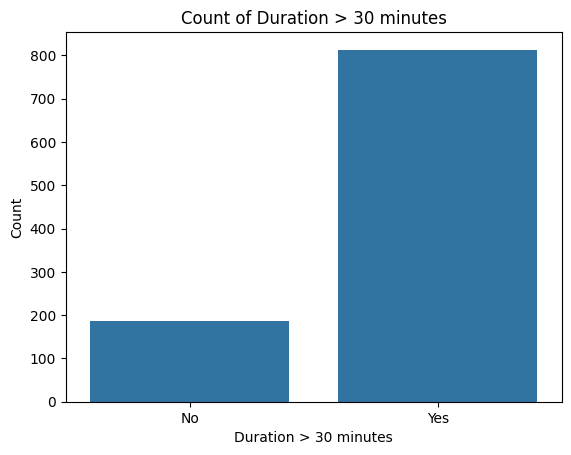

Probability of duration > 30 minutes: 0.81
Mean Visit Duration: 65.40 minutes
Standard Deviation of Visit Duration: 31.72 minutes


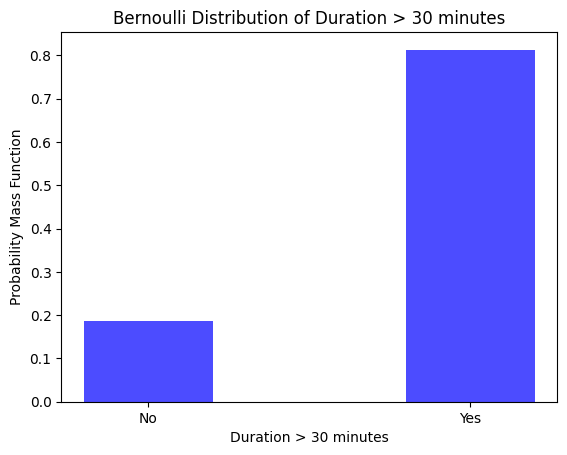

In [7]:
# compute duration>30 column for bernoulli distribution
from scipy.stats import bernoulli

data['duration_gt_30'] = (data['Visit_Duration'] > 30).astype(int)
# plot the distribution of duration
sns.histplot(data['Visit_Duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()
# plot the distribution of duration_gt_30
sns.countplot(x='duration_gt_30', data=data)
plt.title('Count of Duration > 30 minutes')
plt.xlabel('Duration > 30 minutes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#compute bernoulli distribution parameters
p = data['duration_gt_30'].mean()
print(f"Probability of duration > 30 minutes: {p:.2f}")
# compute the mean and standard deviation of the visit duration
mean_duration = data['Visit_Duration'].mean()
std_duration = data['Visit_Duration'].std()
print(f"Mean Visit Duration: {mean_duration:.2f} minutes")
print(f"Standard Deviation of Visit Duration: {std_duration:.2f} minutes")
# plot the bernoulli distribution
x = np.arange(0, 2)
bernoulli_dist = bernoulli(p)
plt.bar(x, bernoulli_dist.pmf(x), width=0.4, alpha=0.7, color='blue')
plt.title('Bernoulli Distribution of Duration > 30 minutes')
plt.xlabel('Duration > 30 minutes')
plt.ylabel('Probability Mass Function')
plt.xticks(x, ['No', 'Yes'])
plt.show()



- Binomial Distribution:
  * Consider 10 random visits; analyze the number of visits where customers spent over $100 using the binomial distribution

Probability of spending more than $100: 0.85
Mean Number of Visits with Spending > $100: 8.53
Standard Deviation of Number of Visits with Spending > $100: 1.12


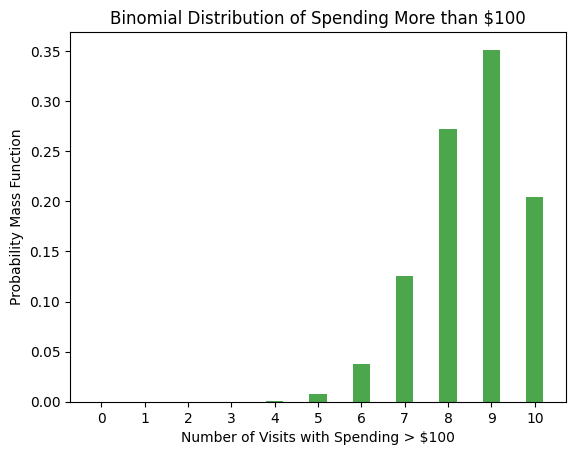

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# parameters to analyse binomial distribution of the number of visits where customers spending more than 100 $ 
n = 10  # number of trials (visits)
# compute probability of success (spending more than $100)
p = data['Purchase_Amount'].gt(100).mean()
print(f"Probability of spending more than $100: {p:.2f}")
# compute the mean and standard deviation of the number of visits with spending > $100
mean_spending = n * p
std_spending = np.sqrt(n * p * (1 - p))
print(f"Mean Number of Visits with Spending > $100: {mean_spending:.2f}")
print(f"Standard Deviation of Number of Visits with Spending > $100: {std_spending:.2f}")
# create an array of possible number of successes
x = np.arange(0, n + 1)
# calculate the binomial distribution
binom_dist = binom.pmf(x, n, p)
# plot the binomial distribution
plt.bar(x, binom_dist, width=0.4, alpha=0.7, color='green')
plt.title('Binomial Distribution of Spending More than $100')
plt.xlabel('Number of Visits with Spending > $100')
plt.ylabel('Probability Mass Function')
plt.xticks(x)
plt.show()






- Poisson Distribution:
  * Analyze the number of customers visiting the store per hour. Assume the store's data indicates an average of 15 customers per hour
  


Mean of Poisson Distribution min and max: 3.059023205018258e-07 - 0.1024358666645339


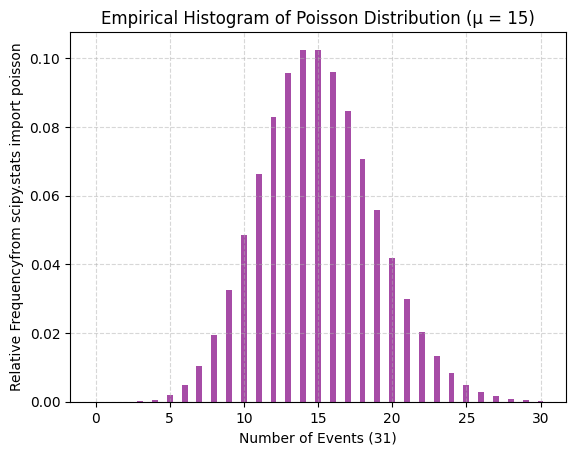

In [34]:
from scipy.stats import poisson
mu = 15
k = 31
x = np.arange(0, k)  # Range of k values for Poisson distribution
data_poisson = poisson.pmf(x, mu)
print(f"Mean of Poisson Distribution min and max: {data_poisson.min()} - {data_poisson.max()}")
# plotting bar chart for Poisson distribution
plt.bar(x, data_poisson, width=0.4, alpha=0.7, color='purple')
# Labels
plt.xlabel(f'Number of Events ({k})')
plt.ylabel('Relative Frequencyfrom scipy.stats import poisson')
plt.title(f'Empirical Histogram of Poisson Distribution (μ = {mu})')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Normal Distribution:
  * Examine the Purchase_Amount variable. Check if it follows a normal distribution. Calculate its mean and standard deviation.
  

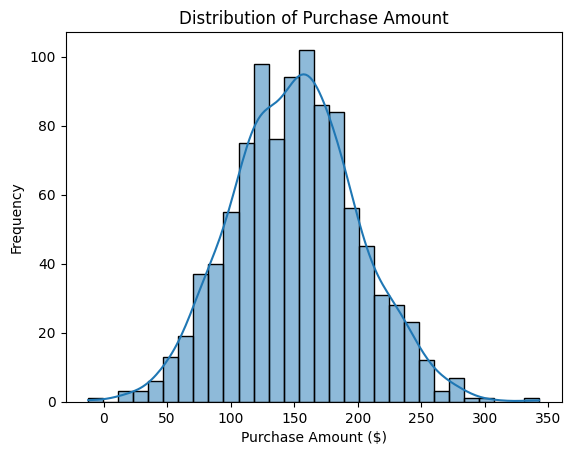

Mean Purchase Amount: $150.97
Standard Deviation of Purchase Amount: $48.96


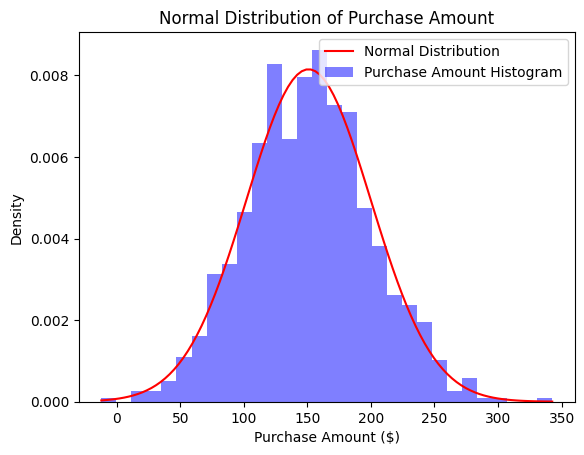

Shapiro-Wilk Test Statistic: 0.9986, p-value: 0.6273
Purchase Amount follows a normal distribution (fail to reject H0).


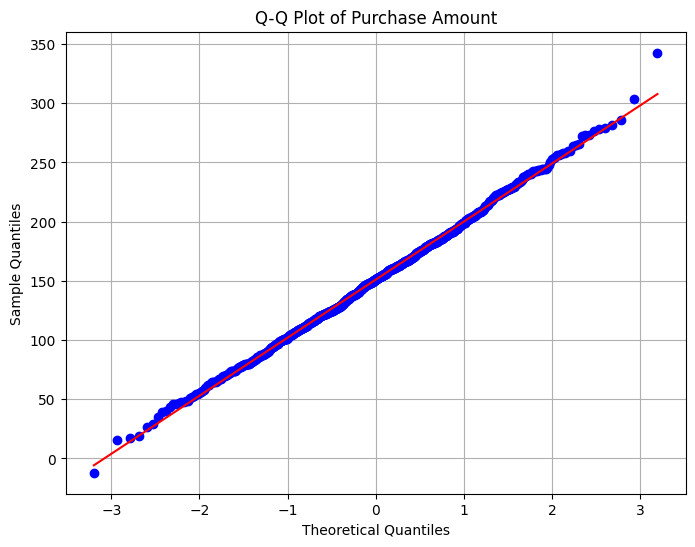

In [38]:
#Examine the Purchase_Amount variable. Check if it follows a normal distribution. Calculate its mean and standard deviation.
sns.histplot(data['Purchase_Amount'], kde=True, bins=30)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Frequency')
plt.show()
mean_purchase = data['Purchase_Amount'].mean()
std_purchase = data['Purchase_Amount'].std()
print(f"Mean Purchase Amount: ${mean_purchase:.2f}")
print(f"Standard Deviation of Purchase Amount: ${std_purchase:.2f}")
# Plot the normal distribution curve
x = np.linspace(data['Purchase_Amount'].min(), data['Purchase_Amount'].max(), 100)
normal_dist = norm.pdf(x, mean_purchase, std_purchase)
plt.plot(x, normal_dist, color='red', label='Normal Distribution')
plt.hist(data['Purchase_Amount'], density=True, bins=30, alpha=0.5, color='blue', label='Purchase Amount Histogram')
plt.title('Normal Distribution of Purchase Amount')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.show()
# Check if the Purchase_Amount follows a normal distribution using the Shapiro-Wilk test
from scipy.stats import shapiro
shapiro_stat, shapiro_p_value = shapiro(data['Purchase_Amount'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")
if shapiro_p_value > 0.05:
    print("Purchase Amount follows a normal distribution (fail to reject H0).")
else:
    print("Purchase Amount does not follow a normal distribution (reject H0).")
# check allignment of the data to a normal distribution using Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data['Purchase_Amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Purchase Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()




- Uniform Distribution:
  * Analyze the Visit_Duration variable under the assumption that all time intervals are equally likely within the store’s opening hours

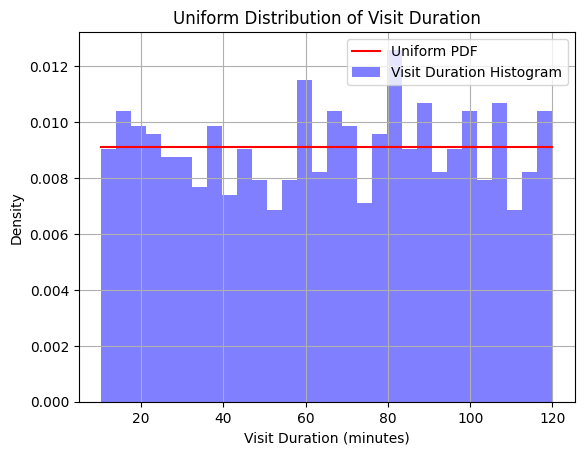

Kolmogorov-Smirnov Test Statistic: 0.0350, p-value: 0.5729
Visit Duration follows a uniform distribution (fail to reject H0).


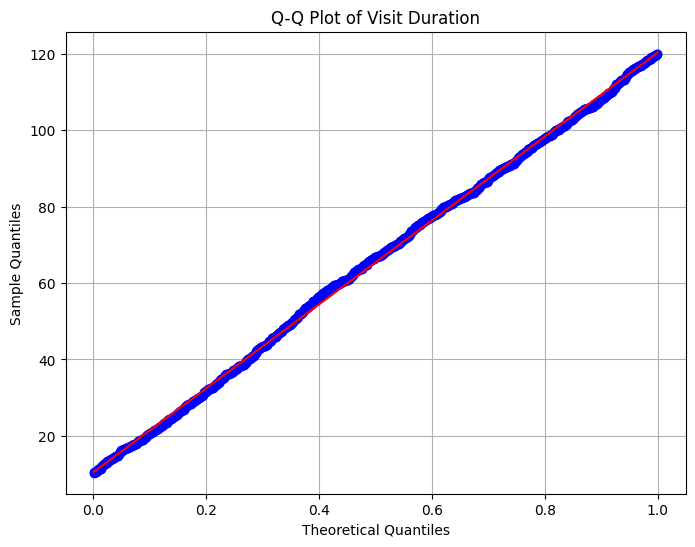

In [43]:
from scipy.stats import uniform

# Generate uniformly distributed data
a, b = data['Visit_Duration'].min(),data['Visit_Duration'].max() # Define the start and end points of the uniform distribution
# Plot histogram
plt.hist(data['Visit_Duration'], bins=30, density=True, alpha=0.5, color='blue')

# Calculate the PDF of the Uniform Distribution
uniform_xs = np.linspace(a, b, 301)
uniform_ys = uniform.pdf(uniform_xs, a, b-a)

# Plot PDF
plt.plot(uniform_xs, uniform_ys, color='red')

# Add labels
plt.xlabel('Visit Duration (minutes)')
plt.ylabel('Density')
plt.title('Uniform Distribution of Visit Duration')

plt.legend(['Uniform PDF', 'Visit Duration Histogram'])
plt.grid(True)

# Display the plot
plt.show()
# is it a uniform distribution?
from scipy.stats import ks_2samp
ks_stat, ks_p_value = ks_2samp(data['Visit_Duration'], uniform.rvs(size=len(data['Visit_Duration']), loc=a, scale=b-a))
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")
if ks_p_value > 0.05:
    print("Visit Duration follows a uniform distribution (fail to reject H0).")
else:
    print("Visit Duration does not follow a uniform distribution (reject H0).")
# Check the alignment of the data to a uniform distribution using a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data['Visit_Duration'], dist="uniform", plot=plt)
plt.title('Q-Q Plot of Visit Duration')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()
